Тут написать описание про себя и проект (кратко)

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [118]:
df = pd.read_csv("hotel_bookings.csv")

df.shape

df.dtypes ##Есть целые числа, дробные числа и переменные класса "object"

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [119]:
df.isna().sum() ##Пропусков почти нет, небольшое количество в одном столбце (country) - их скорее всего можно удалить
## Довольно большое количество пропусков в двух столбцах - (agent, company) - скорее всего прийдется чем то заменять

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

<ipython-input-120-c5f6262b3280>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()
<ipython-input-120-c5f6262b3280>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype = np.bool), cmap = 'BrBG', ax=ax)


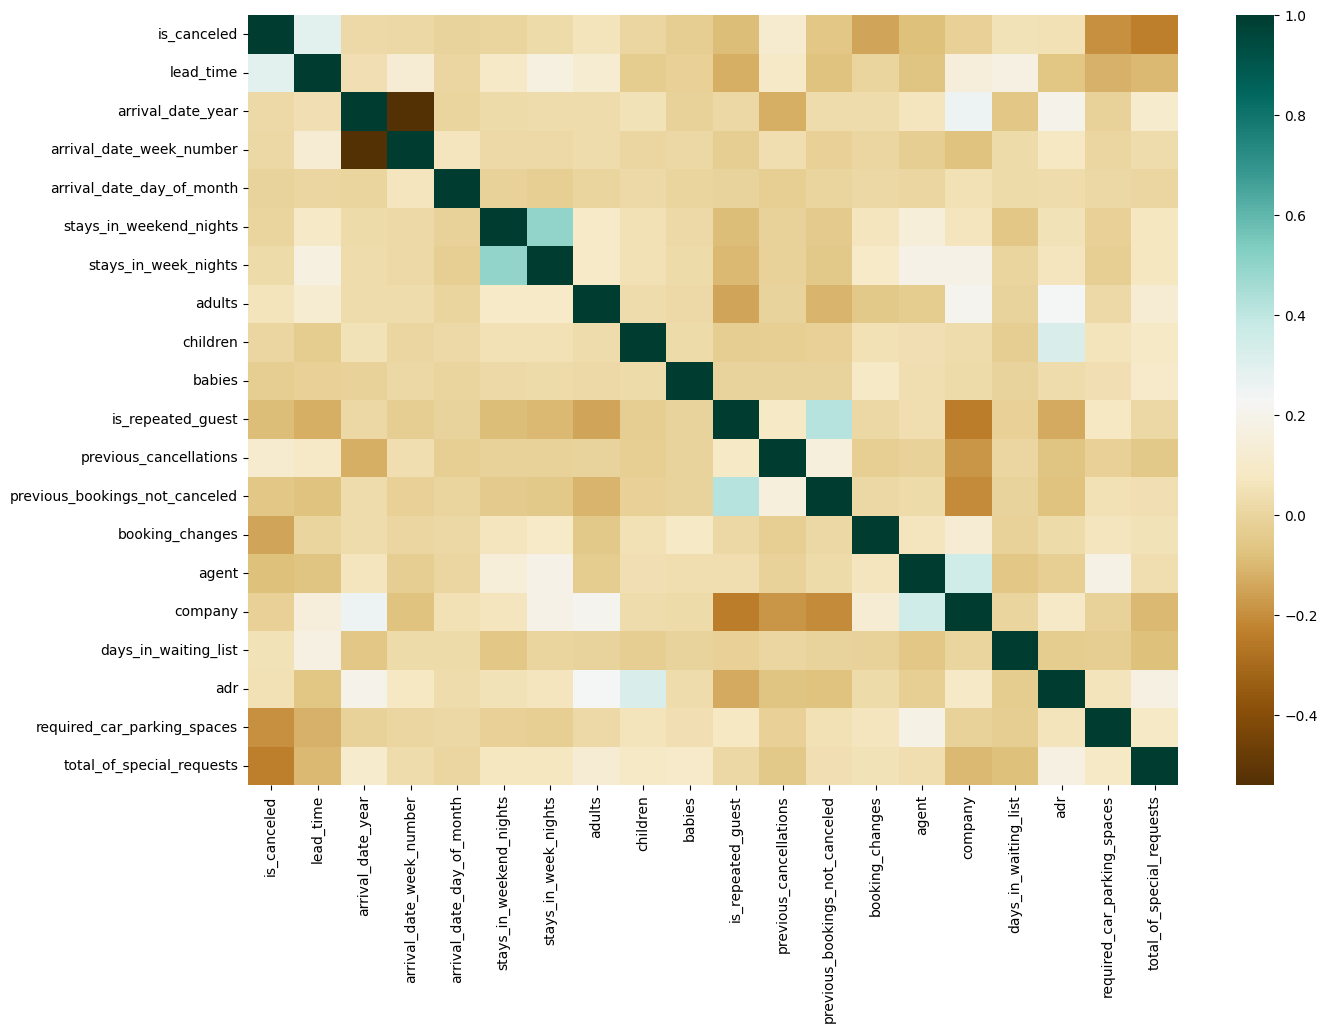

In [120]:
df_corr = df.corr()

f,ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype = np.bool), cmap = 'BrBG', ax=ax)
plt.show()

## - ВИЗУАЛИЗИРОВАТЬ ПРОПУСКИ

## Из кореляционной матрицы мы видим, что связть между многими объектами минимальна

In [121]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

hotel - 0%
is_canceled - 0%
lead_time - 0%
arrival_date_year - 0%
arrival_date_month - 0%
arrival_date_week_number - 0%
arrival_date_day_of_month - 0%
stays_in_weekend_nights - 0%
stays_in_week_nights - 0%
adults - 0%
children - 0%
babies - 0%
meal - 0%
country - 0%
market_segment - 0%
distribution_channel - 0%
is_repeated_guest - 0%
previous_cancellations - 0%
previous_bookings_not_canceled - 0%
reserved_room_type - 0%
assigned_room_type - 0%
booking_changes - 0%
deposit_type - 0%
agent - 14%
company - 94%
days_in_waiting_list - 0%
customer_type - 0%
adr - 0%
required_car_parking_spaces - 0%
total_of_special_requests - 0%
reservation_status - 0%
reservation_status_date - 0%


In [122]:
df = df.drop(columns = ['company']) ## у company почти 100% данных пропущено, так что мы её удаляем

In [123]:
df = df.fillna(df.mean())

<ipython-input-123-04e87d67d337>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [124]:
category = df.loc[:, df.dtypes == object].columns
category

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

In [125]:
df = pd.get_dummies(df, columns=category)

Что нужно сделать: понижение признакого пространства (понижение размерности RSA) - искать в задаче oil/gas, визуализировать пропуски

Попробовать объяснить почему получился максимальный score

In [126]:
#проверим балансировку данных
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [127]:
#разделим данные на features и target
X = df.drop(columns=['is_canceled'])
y = df['is_canceled']

y.value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [128]:
#данные не сбалансированны, это необходимо исправить. Используем алгоритм SMOTE и произведем undersampling

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state = 123, k_neighbors = 25)

column = X.columns

X_os, y_os = os.fit_resample(X, y)
X_os = pd.DataFrame(data = X_os, columns = column)
y_os = pd.DataFrame(data = y_os, columns = ['is_canceled'])

print(X_os.shape, y_os.shape)
y_os.value_counts()

(150332, 1185) (150332, 1)


is_canceled
0              75166
1              75166
dtype: int64

In [129]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

X_os = pd.DataFrame(StandardScaler().fit_transform(X_os), columns = X_os.columns, index = X_os.index)

In [130]:
#данные сбалансированы и обработаны
#переходим к созданию и обучению модели

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_os, y_os, random_state = 123, test_size = 0.4) 

print(X_train.shape, X_test.shape)

(90199, 1185) (60133, 1185)


In [131]:
model = LogisticRegression()

model.fit(X_train, y_train)

pred = model.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [132]:
#посмотрим на результаты по метрикам аккуратности, полноты и точности

from sklearn.metrics import accuracy_score, recall_score, precision_score

print(accuracy_score(pred, y_test))
print(recall_score(pred, y_test))
print(precision_score(pred, y_test))

1.0
1.0
1.0
